In [2]:
import matplotlib as mpl
import numpy as np
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/p1/p1_main.csv')

data.head()

,trial_num,move_times,elbow_end_cm,elbow_end_deg,curs_end_cm,curs_end_deg,error,block,trial_delay,target_cm,...,target_amp,full_feedback,terminal_feedback,rotation_direction,rotation,rotation_angle,clamp,clamp_angle,vibration,trial_type
0,1,0.654514,4.242640,115.566740,4.242640,115.633626,-3.416548,main,0.607,8.285239,...,8,0,1,0,0,0,0,0,0,0
1,2,0.616435,8.387103,119.283739,8.387103,119.328388,0.300450,main,0.980,7.728752,...,8,0,1,0,0,0,0,0,0,0
2,3,0.684454,4.353725,115.647545,4.353725,115.732657,-3.335744,main,0.890,8.172695,...,8,0,1,0,0,0,0,0,0,0
3,4,0.612626,7.591952,118.576701,7.591952,118.619516,-0.406587,main,0.746,7.771020,...,8,0,1,0,0,0,0,0,0,0
4,5,0.712531,4.642404,115.889958,4.642404,115.990013,-3.093331,main,0.967,8.311785,...,8,0,1,0,0,0,0,0,0,0


In [7]:
mean_scores = data.groupby('vibration')['error'].mean()
differences = mean_scores - mean_scores.loc[0]
print("Mean Error Scores by Condition:")
print(mean_scores)
print("\nDifferences from Condition 0:")
print(differences)
differences.drop(0, inplace=True)

Mean Error Scores by Condition:
vibration
0   -3.808584
1   -6.874973
2   -6.168609
3   -5.969291
Name: error, dtype: float64

Differences from Condition 0:
vibration
0    0.000000
1   -3.066389
2   -2.360025
3   -2.160708
Name: error, dtype: float64


C:\Users\gesch\AppData\Local\Temp\ipykernel_17376\290326400.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(["None", "Dual", "Biceps", "Triceps"])


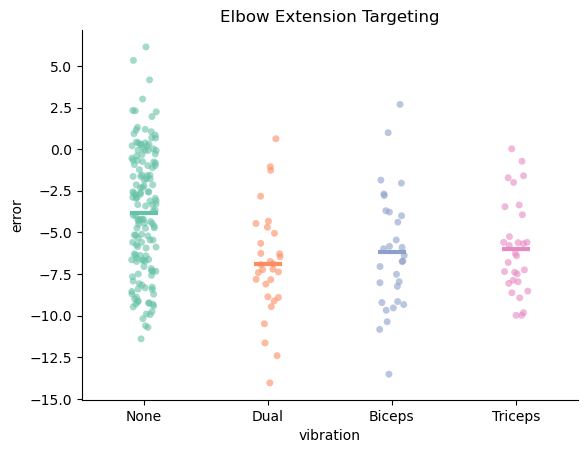

In [71]:
sns.stripplot(
    data=data, x="vibration", y="error", hue="vibration",
    dodge=False, alpha=.6, legend=False, palette="Set2"
)
fig = sns.pointplot(
    data=data, x="vibration", y="error", hue="vibration",
    dodge=0, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3, palette="Set2",
    legend=False
)
plt.title('Elbow Extension Targeting')
fig.set_xticklabels(["None", "Dual", "Biceps", "Triceps"])
plt.savefig("../results/p1/error-scores.png", dpi=1000)

Text(0, 0.5, 'Error')

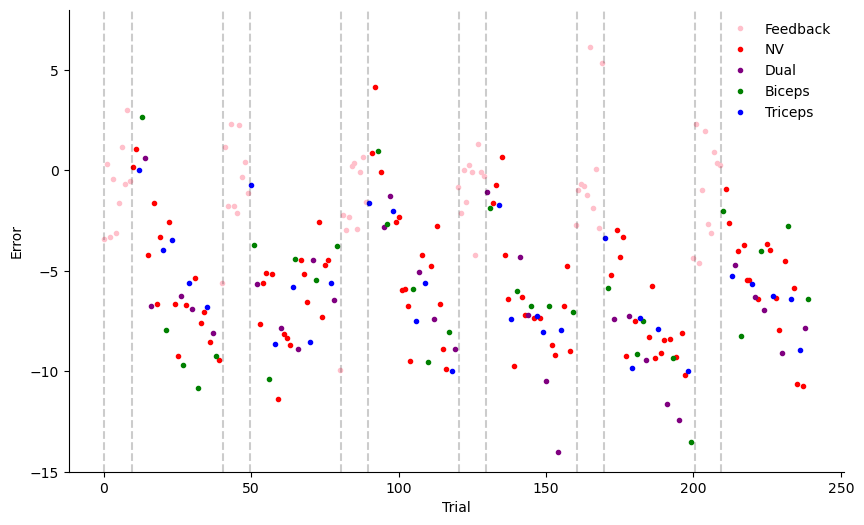

In [73]:
nv = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 0)]
biceps = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 2)]
triceps = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 3)]
dual = data[(data["terminal_feedback"] == 0) & (data['vibration'] == 1)]
verdicial_data = data[data["terminal_feedback"] == 1]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(verdicial_data['error'], '.', color="pink")
ax.plot(nv['error'], '.', color='red')
ax.plot(dual['error'], '.', color='purple')
ax.plot(biceps['error'], '.', color='green')
ax.plot(triceps['error'], '.', color='blue')
lines = [0, 9.5, 40.5, 49.5, 80.5, 89.5, 120.5, 129.5, 160.5, 169.5, 200.5, 209.5]
for line in lines:
    ax.axvline(line, linestyle='--', color='black', alpha=0.2)
ax.set_ylim([-15, 8])
ax.legend(['Feedback','NV', 'Dual', 'Biceps', 'Triceps'], loc='upper right',  frameon=False)
ax.set_xlabel("Trial")
ax.set_ylabel("Error")
# fig.show()
# fig.savefig("../results/p1/error-by-block.png", dpi=1000)